In [1]:
# Function for plotting Skew-T from wrf input data.

import wrf
from wrf import ALL_TIMES
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd

import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.units import units

matplotlib.rcParams['figure.figsize'] = (12, 10)
matplotlib.rcParams.update({'font.size': 18})

In [7]:
def skewTplot(filename, lat_lon):
    wrfin = Dataset(filename)
    x_y = wrf.ll_to_xy(wrfin, lat_lon[0], lat_lon[1])
    p1 = wrf.getvar(wrfin,"pressure",timeidx=0)
    T1 = wrf.getvar(wrfin,"tc",timeidx=0)
    Td1 = wrf.getvar(wrfin,"td",timeidx=0)
    u1 = wrf.getvar(wrfin,"ua",timeidx=0)
    v1 = wrf.getvar(wrfin,"va",timeidx=0)
    p = p1[:,x_y[0],x_y[1]] * units.hPa
    T = T1[:,x_y[0],x_y[1]] * units.degC
    Td = Td1[:,x_y[0],x_y[1]] * units.degC
    u = v1[:,x_y[0],x_y[1]] * units('m/s')
    v = u1[:,x_y[0],x_y[1]] * units('m/s')

    # Example of defining your own vertical barb spacing
    skew = SkewT()

    # Plot the data using normal plotting functions, in this case using
    # log scaling in Y, as dictated by the typical meteorological plot
    skew.plot(p, T, 'r', linewidth=4)
    skew.plot(p, Td, 'g', linewidth=4)
    
    # Set spacing interval--Every 50 mb from 1000 to 100 mb
    my_interval = np.arange(100, 1000, 50) * units('mbar')
    # Get indexes of values closest to defined interval
    ix = mpcalc.resample_nn_1d(p, my_interval)
    
    # Plot only values nearest to defined interval values
    skew.plot_barbs(p[ix], u[ix], v[ix])
    
    lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
    skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')
    # Calculate full parcel profile and add to plot as black line

    prof = mpcalc.parcel_profile(p, T[0], Td[0]) * units.degC
    skew.plot(p, prof, 'k', linewidth=2)

    # Shade areas of CAPE and CIN
    #skew.shade_cin(p, T, prof)
    #skew.shade_cape(p, T, prof)
    
    # Add the relevant special lines
    skew.plot_dry_adiabats()
    skew.plot_moist_adiabats()
    skew.plot_mixing_lines()
    skew.ax.set_ylim(1000, 150)
    skew.ax.set_xlim(-50, 20)
    skew.ax.set_xlabel('Temperature ($^\circ$C)')
    skew.ax.set_ylabel('Pressure (hPa)')
    
    time = wrf.getvar(wrfin,"times", ALL_TIMES)
    title_time = pd.to_datetime(time).strftime('%Y-%m-%d_%H')
    
    plt.title("ET smooth+lowres simulation " + title_time[0])
    #plt.savefig(title_time[0] + ".png")

    #plt.close()
    plt.show()

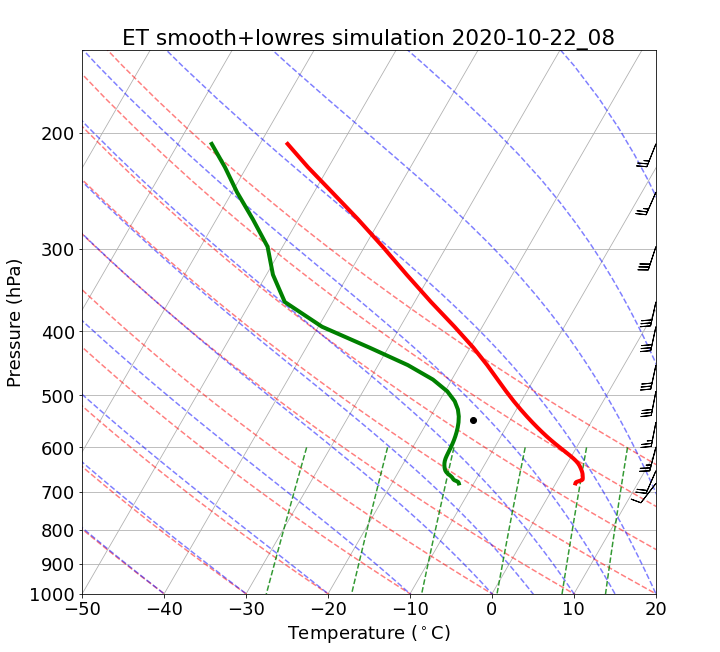

In [8]:
# Test the function by running it on a particular filex
filenames = 'wrfout_d02_2020-10-22_08:00:00'
coords = [40.20, -106.15]
skewTplot(filename = filenames, lat_lon = coords)

In [49]:
# Plot and save the skewT diagram for all wrfout files
coords = [40.20, -106.15]
import os
path_of_the_directory = '/Users/tita6191/Documents/Research/wrf_outputs/ET_smoothed'
ext = (':00:00')
for root, dirs, files in os.walk(path_of_the_directory):
    for name in files:
       if name.endswith(ext):
            print(name)
            skewTplot(filename = name, lat_lon = coords)

wrfout_d02_2020-10-21_05:00:00
wrfout_d02_2020-10-21_21:00:00
wrfout_d02_2020-10-20_23:00:00
wrfout_d02_2020-10-21_23:00:00
wrfout_d02_2020-10-21_07:00:00
wrfout_d02_2020-10-22_08:00:00
wrfout_d02_2020-10-21_03:00:00
wrfout_d02_2020-10-21_18:00:00
wrfout_d02_2020-10-21_01:00:00
wrfout_d02_2020-10-22_10:00:00
wrfout_d02_2020-10-20_22:00:00
wrfout_d02_2020-10-21_22:00:00
wrfout_d02_2020-10-22_09:00:00
wrfout_d02_2020-10-21_06:00:00
wrfout_d02_2020-10-21_04:00:00
wrfout_d02_2020-10-21_20:00:00
wrfout_d02_2020-10-21_19:00:00
wrfout_d02_2020-10-21_00:00:00
wrfout_d02_2020-10-21_02:00:00
wrfout_d02_2020-10-21_17:00:00
wrfout_d02_2020-10-22_01:00:00
wrfout_d02_2020-10-22_03:00:00
wrfout_d02_2020-10-21_15:00:00
wrfout_d02_2020-10-21_11:00:00
wrfout_d02_2020-10-22_07:00:00
wrfout_d02_2020-10-21_08:00:00
wrfout_d02_2020-10-22_05:00:00
wrfout_d02_2020-10-21_13:00:00
wrfout_d02_2020-10-22_02:00:00
wrfout_d02_2020-10-21_14:00:00
wrfout_d02_2020-10-21_16:00:00
wrfout_d02_2020-10-22_00:00:00
wrfout_d

In [48]:
# Check to see why the pressure only goes up to ~ 680
filename = 'wrfout_d02_2020-10-22_10:00:00'
wrfin = Dataset(filename)

lat_lon = [40.20, -106.15]
x_y = wrf.ll_to_xy(wrfin, lat_lon[0], lat_lon[1])


p1 = wrf.getvar(wrfin,"pressure",timeidx=0)
p = p1[:,x_y[0],x_y[1]] * units.hPa

hgt1 = wrf.getvar(wrfin,"height",timeidx=0)
hgt = hgt1[:,x_y[0],x_y[1]] * units.meters

# It generally checks out! actual pressure at a height of ~3,000m is about 680